In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import cv2

In [42]:
from scipy import misc
df = misc.face()

In [45]:
df = cv2.cvtColor(df , cv2.COLOR_BGR2GRAY)

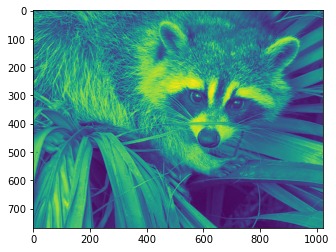

In [46]:
plt.imshow(df)

In [50]:
pd.DataFrame(df)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,119,136,151,153,153,156,157,154,145,135,...,160,155,152,142,127,113,107,110,119,127
1,88,109,129,136,140,148,152,151,163,153,...,153,148,141,130,114,101,99,108,124,136
2,72,93,114,122,126,131,132,129,138,134,...,144,137,118,112,101,95,97,109,125,136
3,83,99,115,122,127,128,122,113,103,103,...,125,115,96,98,100,102,105,109,114,118
4,104,115,125,134,144,149,142,129,111,103,...,97,86,90,96,105,111,111,108,104,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,119,106,99,108,120,122,120,119,108,114,...,137,136,137,137,137,136,136,136,135,135
764,105,100,105,119,127,123,117,117,116,122,...,137,136,137,138,137,137,136,136,135,134
765,95,100,112,126,130,123,117,118,121,125,...,142,141,137,136,137,138,137,135,134,135
766,91,101,116,126,129,126,123,123,123,126,...,140,142,135,135,136,136,136,135,133,133


In [58]:
model = PCA()
model.fit_transform(df)

array([[ 1.40880350e+02,  2.91799748e+02,  3.57471966e+02, ...,
        -1.67661079e-02,  7.80023447e-03,  3.97126679e-13],
       [ 1.25736049e+02,  2.61171284e+02,  3.55229340e+02, ...,
         5.12562673e-02,  3.14256195e-02,  3.97126679e-13],
       [ 7.91487100e+01,  1.92437898e+02,  3.12061981e+02, ...,
        -4.81640205e-02, -1.30453718e-01,  3.97126679e-13],
       ...,
       [-1.01477514e+03,  1.08373838e+02,  2.68773720e+02, ...,
         8.70385608e-02, -9.89091571e-03,  3.97126679e-13],
       [-1.00915835e+03,  7.93713458e+01,  2.92051606e+02, ...,
        -1.35879632e-01,  7.32514808e-02,  3.97126679e-13],
       [-9.96704713e+02,  6.00986528e+01,  3.07570481e+02, ...,
         5.22445734e-02, -5.39632839e-02,  3.97126679e-13]])

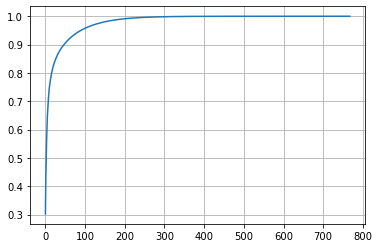

In [61]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.grid(True)

In [62]:
model = PCA(n_components=200)
df_new = model.fit_transform(df)

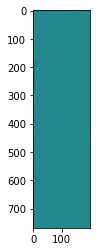

In [70]:
plt.imshow(df_new)

In [71]:
df_k = PCA(n_components=2)
df_km = df_k.fit_transform(df)

In [73]:
kmean = KMeans(n_clusters=5)
kmean.fit(df_km)

KMeans(n_clusters=5)

In [81]:
df_km = pd.DataFrame(df_km)

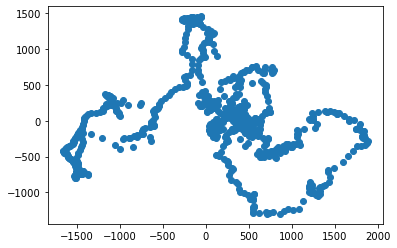

In [82]:
plt.scatter(df_km.iloc[:,0],df_km.iloc[:,1])

TypeError: scatter() missing 1 required positional argument: 'y'

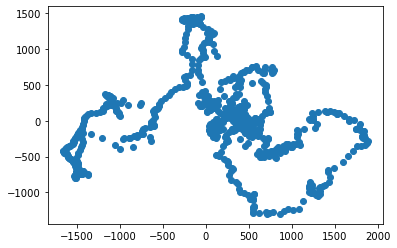

In [83]:
plt.scatter(df_km.iloc[:,0],df_km.iloc[:,1])
plt.scatter(kmean.predict(df_km))

In [92]:
df_km["Prediction"] = kmean.predict(df_km)

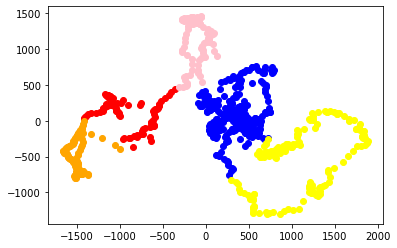

In [110]:
plt.scatter(df_km[df_km["Prediction"] == 0].iloc[:,0],df_km[df_km["Prediction"] == 0].iloc[:,1] , color = "blue")
plt.scatter(df_km[df_km["Prediction"] == 1].iloc[:,0],df_km[df_km["Prediction"] == 1].iloc[:,1] , color = "red")
plt.scatter(df_km[df_km["Prediction"] == 2].iloc[:,0],df_km[df_km["Prediction"] == 2].iloc[:,1] , color = "orange")
plt.scatter(df_km[df_km["Prediction"] == 3].iloc[:,0],df_km[df_km["Prediction"] == 3].iloc[:,1] , color = "pink")
plt.scatter(df_km[df_km["Prediction"] == 4].iloc[:,0],df_km[df_km["Prediction"] == 4].iloc[:,1] , color = "yellow")
